In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test_modified.csv")
train = pd.read_csv("train_modified.csv")

In [2]:
print('length of training data is {}'.format(len(train)))
print('length of test data is {}'.format(len(test)))
display(train.head())
display(test.head())

length of training data is 400
length of test data is 100


,Unnamed: 0,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time,l1,l2
0,0,0.0001,260,8,888,693,6,5,7,0.054888,88.253265,0.306373,0.000000,0.000000
1,1,0.0100,586,2,210,159,10,3,10,0.079541,9.841284,0.903029,0.654141,0.345859
2,2,0.0100,518,1,788,531,7,4,8,0.053867,69.568247,10.453464,0.851020,0.148980
3,3,0.0001,893,1,181,204,4,2,7,0.041888,53.843158,0.184302,0.000000,0.000000
4,4,0.0100,400,8,561,323,9,5,12,0.064665,82.300420,1.106038,0.484963,0.515037


,Unnamed: 0,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,l1,l2
0,0,0.0010,390,8,760,373,2,2,6,0.075282,33.163360,0.000000,1.000000
1,1,0.0010,452,16,877,321,8,5,9,0.096269,42.781182,0.883440,0.116560
2,2,0.0100,1016,1,588,323,8,5,8,0.077733,43.522123,0.840487,0.159513
3,3,0.0001,887,8,225,773,6,4,9,0.042324,47.321246,0.000000,0.000000
4,4,0.0001,1224,8,708,509,8,5,12,0.055850,54.050923,0.000000,0.000000


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


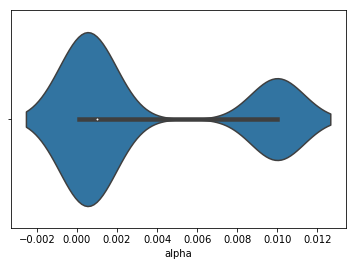

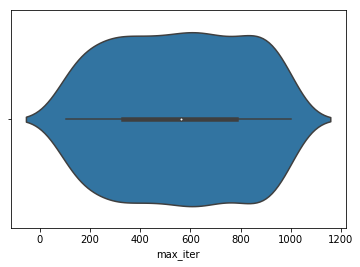

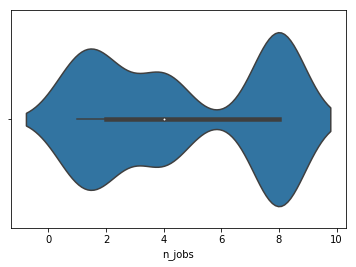

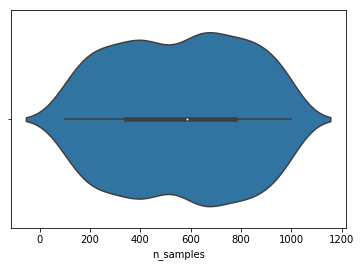

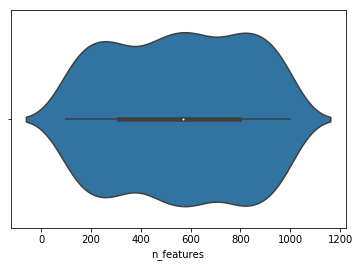

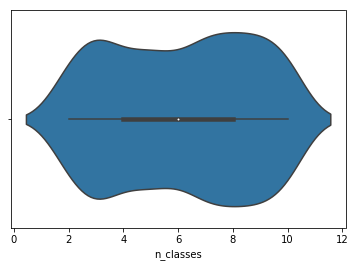

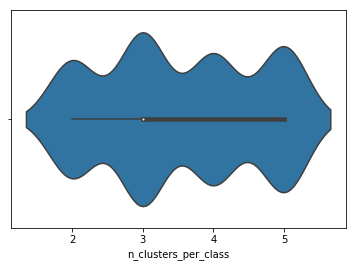

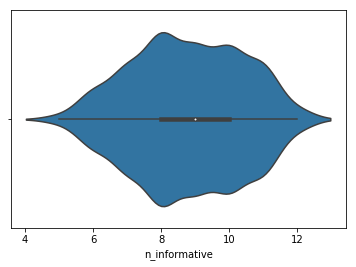

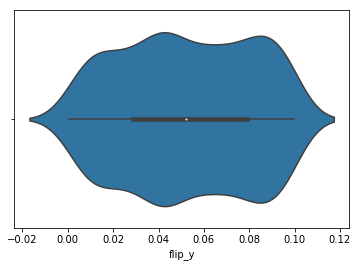

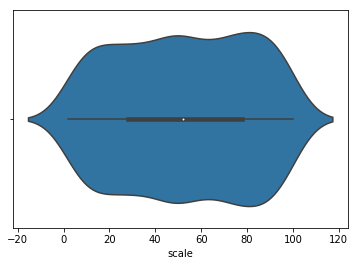

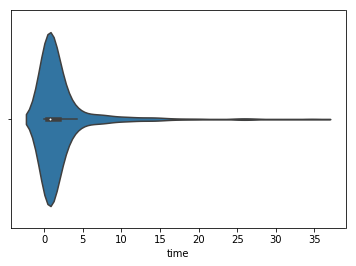

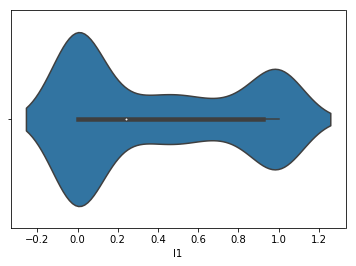

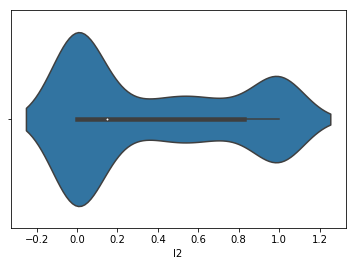

In [3]:
# 每个属性的特点
C = train.columns[1:]
for i in range(len(C)):
    plt.figure(i)
    Z = train[C[i]].values
    sns.violinplot(Z)
    plt.xlabel(C[i])
plt.show()

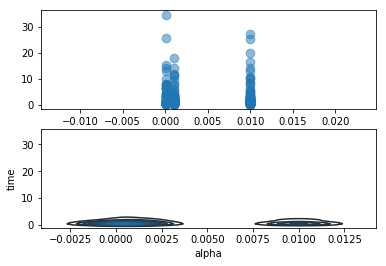

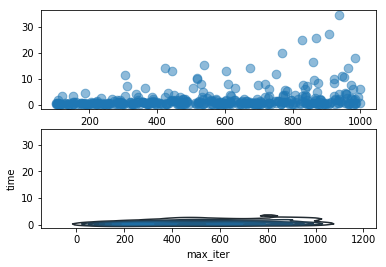

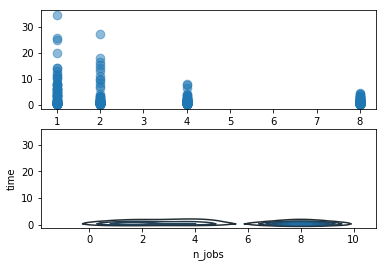

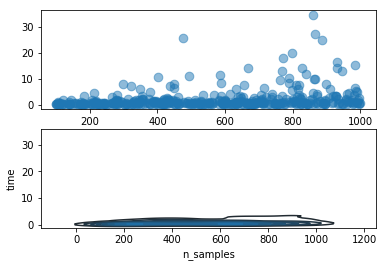

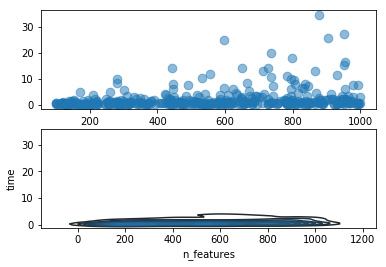

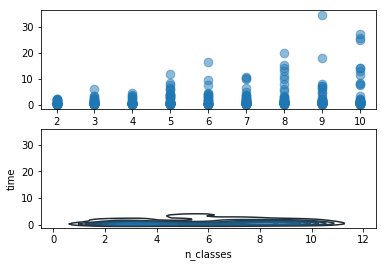

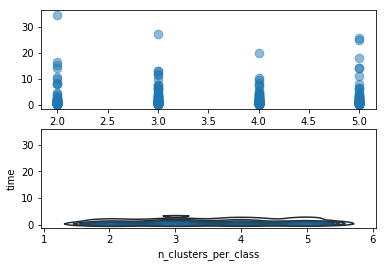

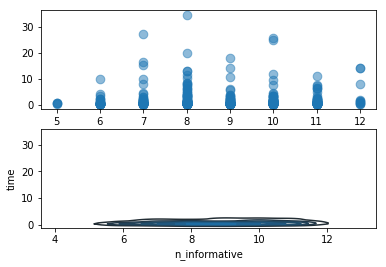

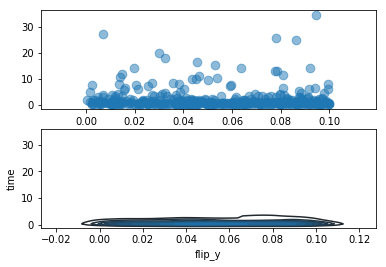

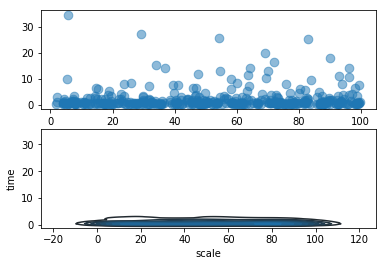

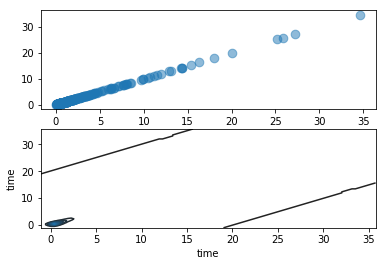

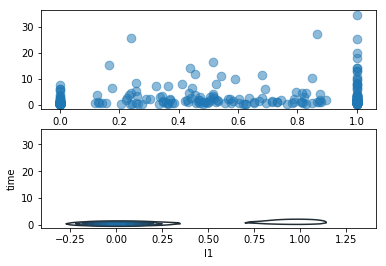

In [4]:
# 属性和时间的关系
C = train.columns[1:-1]
for i in range(len(C)):
    plt.figure(i)
    plt.subplot(211)
    Z = train[[C[i],'time']].values
    plt.scatter(Z[:,0],Z[:,1], s=75, alpha=.5)
    plt.subplot(212)
    sns.kdeplot(Z[:,0],Z[:,1])
    plt.xlabel(C[i])
    plt.ylabel('time')  
plt.show()

In [ ]:
# 两两关系
sns.pairplot(train.loc[:, train.columns != 'id'])

In [ ]:
# PCA
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

X = pca.fit_transform(train.iloc[:,1:-1].values, train['time'].values)

plt.scatter(X[:,0], X[:,1], c=np.log(train['time']))
plt.colorbar()
plt.show()

In [ ]:
# ICA
from sklearn import decomposition

fica = decomposition.FastICA(n_components=2)

X = fica.fit_transform(train.iloc[:,1:-1].values, train['time'].values)

plt.scatter(X[:,0], X[:,1], c=np.log(train['time']))
plt.colorbar()
plt.show()

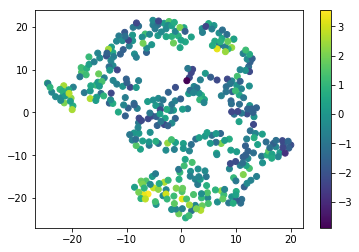

In [5]:
# TSNE
from sklearn.manifold import TSNE

X = TSNE(n_components=2).fit_transform(train.iloc[:,1:-1].values, train['time'].values)

plt.scatter(X[:,0], X[:,1], c=np.log(train['time']))
plt.colorbar()
plt.show()

In [ ]:
# make_classifcation
from sklearn.datasets import make_classification
tx, ty = make_classification(200,10,shuffle=False)
plt.scatter(tx[:,0], tx[:,1], c=ty)
plt.show()

In [ ]:
# end2end
# build the model
from sklearn import linear_model
from sklearn import tree
reg = linear_model.LinearRegression()
# reg = tree.DecisionTreeRegressor()
reg.fit(train.iloc[:,1:-1].values, train['time'].values)

In [ ]:
# predict
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(train.iloc[:,1:-1].values)
mean_squared_error(train['time'].values,y_pred)

In [ ]:
# visualization
form = pd.DataFrame()
form['pred'] = y_pred
form['train'] = train['time'].values
display(form)